In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_csv('input/Accidents0515.csv')
data2 = pd.read_csv('input/Casualties0515.csv')
data3 = pd.read_csv('input/Vehicles0515.csv')
data = pd.merge(data1,data2,on='Accident_Index')

In [2]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data.shape)

(1780653, 32)
(1048575, 15)
(1048575, 22)
(679971, 46)


In [3]:
final_data = pd.merge(data,data3,on='Accident_Index')
final_data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,1,15,2,49,8,1769,1,4,2,1


In [4]:
print(data.shape)
print(final_data.shape)

(679971, 46)
(961906, 67)


<b>Casuality Severity & Number of Casualities -> Response Variables</b>

In [5]:
fd = final_data[final_data.T[final_data.dtypes!=np.object].index]
fd = fd.dropna()

In [6]:
y1 = pd.cut(fd['Number_of_Casualties'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 100 ], labels=np.array('1 2 3 4 5 6 7 8 9 >9'.split()))
X = fd
del X['Number_of_Casualties']

X.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Day_of_Week,Local_Authority_(District),1st_Road_Class,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,3,12,3,...,1,15,2,74,10,-1,-1,-1,7,1
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,4,12,4,...,1,1,1,42,7,8268,2,3,-1,-1
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,5,12,5,...,1,1,1,35,6,8300,2,5,2,1
3,524520.0,182240.0,-0.206458,51.525301,1,3,2,5,12,5,...,1,15,1,62,9,1762,1,6,1,1
4,526900.0,177530.0,-0.173862,51.482442,1,3,1,6,12,3,...,1,15,2,49,8,1769,1,4,2,1


<b>Plot Frequencies of Number_Of_Casualties</b>

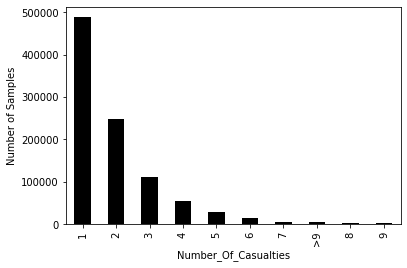

In [7]:
import matplotlib.pyplot as plt
import pandas

fig, ax = plt.subplots()
y1.value_counts().plot(ax=ax, kind='bar', color='black')
plt.xlabel('Number_Of_Casualties')
plt.ylabel('Number of Samples')
plt.show()

<b>Selecting Features</b>

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.10, random_state=42)
print(X_train.shape)

(865593, 61)


In [9]:
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression

select = SelectPercentile(percentile=50)
select.fit(X, y1)
X_selected = select.transform(X)

print('X.shape is: {}'.format(X.shape))
print('X_selected.shape is: {}'.format(X_selected.shape))

C:\Users\HP\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [37] are constant.
  UserWarning)
C:\Users\HP\Anaconda\envs\MachineLearning\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


X.shape is: (961770, 61)
X_selected.shape is: (961770, 30)


[ True  True  True  True False  True  True False False  True False False
  True False  True  True False False False  True False  True False False
  True  True  True  True  True  True False False False  True  True  True
  True False  True False  True False False False False  True False False
 False False False False False False  True  True  True  True False False
  True]


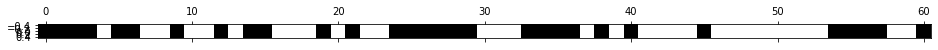

In [10]:
%matplotlib inline
masked_feaures_ftest = select.get_support()
print(masked_feaures_ftest)
plt.matshow(masked_feaures_ftest.reshape(1,-1), cmap='gray_r')

In [11]:
print("Total number of features selected via f-test : " + str((masked_feaures_ftest==True).sum()) )

Total number of features selected via f-test : 30


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.99, random_state=43)
print(X_train.shape)

(9617, 61)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [14]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=20, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs11 = sfs1.fit(X_train.as_matrix(), y1_train.as_matrix())
sfs11.k_feature_idx_

C:\Users\HP\Anaconda\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:   54.0s finished

[2020-10-13 15:55:22] Features: 1/20 -- score: 0.6980347301653322[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   41.4s finished

[2020-10-13 15:56:03] Features: 2/20 -- score: 0.7308932099407299[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(

(3, 5, 6, 17, 21, 22, 23, 25, 26, 27, 32, 33, 34, 36, 37, 38, 42, 44, 46, 51)

[0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


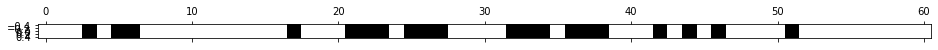

In [15]:
vals = np.array(sfs11.k_feature_idx_)
masked_feaures_sfs = np.zeros(61)
for i in vals:
    masked_feaures_sfs[i]=1
print(masked_feaures_sfs)
plt.matshow(masked_feaures_sfs.reshape(1,-1), cmap='gray_r')

In [16]:
print("Total number of features selected via SFS : " + str((masked_feaures_sfs==True).sum()) )

Total number of features selected via SFS : 20


In [17]:
sfs2 = SFS(knn, 
           k_features=20, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs21 = sfs2.fit(X_train.as_matrix(), y1_train.as_matrix())
sfs21.k_feature_idx_

C:\Users\HP\Anaconda\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:  1.1min finished

[2020-10-13 16:13:19] Features: 60/20 -- score: 0.6176562337527295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   58.9s finished

[2020-10-13 16:14:18] Features: 59/20 -- score: 0.6177602162836644[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  59 out of 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   24.2s finished

[2020-10-13 16:31:54] Features: 33/20 -- score: 0.6178641988145992[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   24.3s finished

[2020-10-13 16:32:18] Features: 32/20 -- score: 0.6178641988145992[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   22.9s finished

[2020-10-13 16:32:41] Features: 31/20 -- score: 0.617968181345534[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 

(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 38)

[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


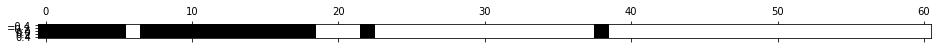

In [18]:
vals1 = np.array(sfs21.k_feature_idx_)
masked_feaures_sbs = np.zeros(61)
for i in vals1:
    masked_feaures_sbs[i]=1
print(masked_feaures_sbs)
plt.matshow(masked_feaures_sbs.reshape(1,-1), cmap='gray_r')

In [19]:
print("Total number of features selected via SBS : " + str((masked_feaures_sbs==True).sum()) )

Total number of features selected via SBS : 20


[False False False  True False  True  True False False False False False
 False False False False False False False False False  True False False
 False  True  True  True False False False False False  True  True False
  True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False]


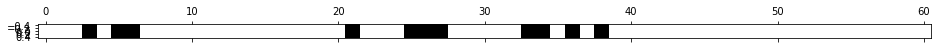

In [20]:
masked_features_intersect_1 = np.logical_and(masked_feaures_ftest,masked_feaures_sfs)
print(masked_features_intersect_1)
plt.matshow(masked_features_intersect_1.reshape(1,-1), cmap = 'gray_r')

[ True  True  True  True False  True False False False  True False False
  True False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False]


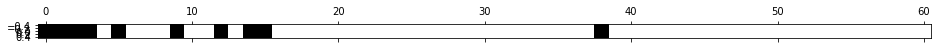

In [21]:
masked_features_intersect_2 = np.logical_and(masked_feaures_ftest,masked_feaures_sbs)
print(masked_features_intersect_2)
plt.matshow(masked_features_intersect_2.reshape(1,-1), cmap = 'gray_r')

In [22]:
print("Total number of features selected via SBS : " + str((masked_features_intersect_1==True).sum()) )

Total number of features selected via SBS : 11


In [23]:
print("Total number of features selected via SBS : " + str((masked_features_intersect_2==True).sum()) )

Total number of features selected via SBS : 10


[ True  True  True  True False  True  True False False  True False False
  True False  True  True False False False False False  True False False
 False  True  True  True False False False False False  True  True False
  True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False]


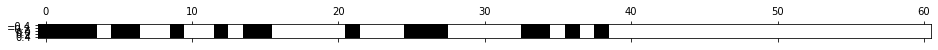

In [24]:
masked_features_final = np.logical_or(masked_features_intersect_1,masked_features_intersect_2)
print(masked_features_final)
plt.matshow(masked_features_final.reshape(1,-1), cmap = 'gray_r')

In [25]:
print("Total number of features selected finally : " + str((masked_features_final==True).sum()) )

Total number of features selected finally : 18


__Filter data ot have only new features__

In [26]:
# The list of your K best features
new_features = [] 

for bool, feature in zip(masked_features_final, X.columns.tolist()):
    if bool:
        new_features.append(feature)

X_new= pd.DataFrame(X, columns=new_features)
X_new.columns = X_new.columns.values.tolist()
X_new = X[X_new.columns.values.tolist()]
X_new.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,1st_Road_Class,Speed_limit,Junction_Control,2nd_Road_Class,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Reference_x,Casualty_Reference,Pedestrian_Location,Pedestrian_Movement,Bus_or_Coach_Passenger,Casualty_Type
0,525680.0,178240.0,-0.191170,51.489096,2,1,3,30,-1,-1,2,1,1,1,1,1,0,0
1,524170.0,181650.0,-0.211708,51.520075,3,1,4,30,2,5,1,1,1,1,0,0,4,11
2,524520.0,182240.0,-0.206458,51.525301,3,2,5,30,-1,-1,1,1,2,1,0,0,0,9
3,524520.0,182240.0,-0.206458,51.525301,3,2,5,30,-1,-1,1,1,2,1,0,0,0,9
4,526900.0,177530.0,-0.173862,51.482442,3,1,3,30,-1,-1,1,1,1,1,5,2,0,0


In [27]:
print(X_new.shape)

(961770, 18)


__Decision Tree Classifier__

In [28]:
from sklearn.model_selection import train_test_split
X_train_f, X_test_f, y1_train_f, y1_test_f = train_test_split(X_new, y1, test_size=0.10, random_state=45)
print(X_train_f.shape)
print(X_test_f.shape)

(865593, 18)
(96177, 18)


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_f, y1_train_f)
cross_val_score(clf, X_train_f, y1_train_f, cv=10)

array([0.91267329, 0.91259242, 0.91281192, 0.91344632, 0.9144052 ,
       0.91425502, 0.91282247, 0.91505216, 0.91252209, 0.91333079])

In [30]:
acc_train = clf.score(X_train_f,y1_train_f)
acc_test = clf.score(X_test_f,y1_test_f)

In [31]:
print("Train accuracy of DT classifier - {:.2f}%".format(acc_train*100))
print("Test accuracy of DT classifier - {:.2f}%".format(acc_test*100))

Train accuracy of DT classifier - 99.68%
Test accuracy of DT classifier - 93.71%


__Ranking features__

Feature ranking:
1. feature 13 (0.292934)
2. feature 3 (0.124774)
3. feature 2 (0.122296)
4. feature 1 (0.119415)
5. feature 0 (0.116203)
6. feature 17 (0.049450)
7. feature 6 (0.028832)
8. feature 7 (0.024673)
9. feature 10 (0.024567)
10. feature 9 (0.022673)
11. feature 5 (0.021754)
12. feature 8 (0.017957)
13. feature 12 (0.013482)
14. feature 4 (0.010644)
15. feature 11 (0.006172)
16. feature 16 (0.002762)
17. feature 15 (0.000740)
18. feature 14 (0.000671)


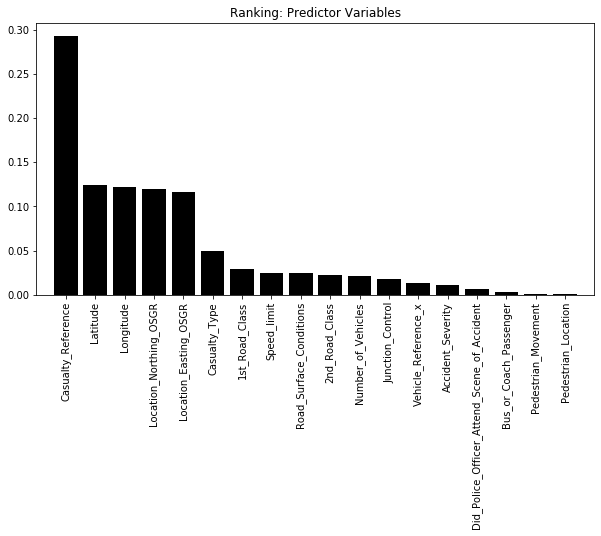

In [32]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_f.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10,5))
plt.title("Ranking: Predictor Variables")
plt.bar(range(X_train_f.shape[1]), importances[indices],
       color="black", yerr=std[indices], align="center")
plt.xticks(range(X_train_f.shape[1]), X_train_f.columns[indices], rotation='vertical')
plt.xlim([-1, X_train_f.shape[1]])
plt.show()

__Nave Bayes Classifier__

In [33]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
clf2.fit(X_train_f, y1_train_f)

GaussianNB()

In [34]:
acc_train = clf2.score(X_train_f,y1_train_f)
acc_test = clf2.score(X_test_f,y1_test_f)

In [35]:
print("Train accuracy of NB classifier - {:.2f}%".format(acc_train*100))
print("Test accuracy of NB classifier - {:.2f}%".format(acc_test*100))

Train accuracy of NB classifier - 50.05%
Test accuracy of NB classifier - 50.22%


__KNN Classifier (k=2)__

In [36]:
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier(n_neighbors=2)
clf3.fit(X_train_f, y1_train_f)

KNeighborsClassifier(n_neighbors=2)

In [37]:
acc_train = clf3.score(X_train_f,y1_train_f)
acc_test = clf3.score(X_test_f,y1_test_f)

In [38]:
print("Train accuracy of KNN classifier (k=2)- {:.2f}%".format(acc_train*100))
print("Test accuracy of KNN classifier (k=2)- {:.2f}%".format(acc_test*100))

Train accuracy of KNN classifier (k=2)- 99.31%
Test accuracy of KNN classifier (k=2)- 93.52%


__KNN Classifier (k=5)__

In [39]:
from sklearn.neighbors import KNeighborsClassifier
clf3b = KNeighborsClassifier(n_neighbors=5)
clf3b.fit(X_train_f, y1_train_f)

KNeighborsClassifier()

In [40]:
acc_train = clf3b.score(X_train_f,y1_train_f)
acc_test = clf3b.score(X_test_f,y1_test_f)

In [41]:
print("Train accuracy of KNN classifier (k=5)- {:.2f}%".format(acc_train*100))
print("Test accuracy of KNN classifier (k=5)- {:.2f}%".format(acc_test*100))

Train accuracy of KNN classifier (k=5)- 88.08%
Test accuracy of KNN classifier (k=5)- 80.09%


__KNN Classifier (k=10)__

In [42]:
from sklearn.neighbors import KNeighborsClassifier
clf3c = KNeighborsClassifier(n_neighbors=10)
clf3c.fit(X_train_f, y1_train_f)

KNeighborsClassifier(n_neighbors=10)

In [43]:
acc_train = clf3c.score(X_train_f,y1_train_f)
acc_test = clf3c.score(X_test_f,y1_test_f)

In [44]:
print("Train accuracy of KNN classifier (k=10)- {:.2f}%".format(acc_train*100))
print("Test accuracy of KNN classifier (k=10)- {:.2f}%".format(acc_test*100))

Train accuracy of KNN classifier (k=10)- 76.28%
Test accuracy of KNN classifier (k=10)- 67.78%


__Obtain Decision Rules__

In [175]:
def print_list(indent, l):
    strlist = ""
    for x in l:
        strlist = strlist + ("{}Class {} with conf {:.2f}%\n".format(indent, x[0],x[1]))
    return strlist

In [182]:
from sklearn.tree import _tree
from collections import Counter

# max_depth_rule var used to define the number of variables in decision rules obtained
def decision_rules(tree, feature_names, max_depth_rule = 3):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth, classes_for_rule, max_depth_rule):
        if(classes_for_rule == None or depth==max_depth_rule+1):
            classes_for_rule = []
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            if(depth<=max_depth_rule):
                print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1, classes_for_rule, max_depth_rule)
            if(depth<=max_depth_rule):
                print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1, classes_for_rule, max_depth_rule)
        else:
            ll = tree_.value[node][0]
            classes_for_rule.append(ll.argmax())
        if(depth==max_depth_rule+1):
            c = Counter(classes_for_rule)
            x = [(i, c[i] / len(classes_for_rule) * 100.0) for i,count in c.most_common()]
            print("{}".format(print_list(indent, x)))
    
    #start recursion at base node
    classes_for_rule = []
    recurse(0, 1, classes_for_rule, max_depth_rule)

In [184]:
decision_rules(clf, X_new.columns, 3)

  if Casualty_Reference <= 1.5:
    if Casualty_Type <= 6.5:
      if Number_of_Vehicles <= 2.5:
        Class 0 with conf 54.31%
        Class 1 with conf 40.47%
        Class 2 with conf 3.99%
        Class 3 with conf 0.84%
        Class 4 with conf 0.28%
        Class 5 with conf 0.09%
        Class 6 with conf 0.02%

      else:  # if Number_of_Vehicles > 2.5
        Class 0 with conf 48.30%
        Class 1 with conf 37.58%
        Class 2 with conf 9.82%
        Class 3 with conf 2.30%
        Class 4 with conf 1.50%
        Class 5 with conf 0.20%
        Class 7 with conf 0.10%
        Class 9 with conf 0.10%
        Class 6 with conf 0.10%

    else:  # if Casualty_Type > 6.5
      if Accident_Severity <= 2.5:
        Class 0 with conf 29.98%
        Class 1 with conf 29.55%
        Class 2 with conf 18.33%
        Class 3 with conf 10.98%
        Class 4 with conf 5.94%
        Class 5 with conf 2.88%
        Class 6 with conf 1.04%
        Class 7 with conf 0.51%
        Cla